In [1]:
%matplotlib inline 
%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = 'retina' # I use a HiDPI screen

In [2]:
import numpy as np
import itertools
from subprocess import call
import matplotlib.pyplot as plt
import fishchips.camb

In [52]:
# camb_dir = "/home/zequnl/Installs/franyancr-ethos_camb-3f4c02cd3668/"
# camb_exec = "ethos_camb"

camb_dir = "/home/zequnl/Installs/CAMB/"
camb_exec = "camb"

obs = fishchips.camb.CAMB_Observables(["omDRh2"], [1.35e-6], [5.6e-8], [2.2e-6],
                                      output_root = "spectra/new_ethos_a4",
                                     CAMB_directory=camb_dir,
                                     CAMB_executable=camb_exec)

In [53]:
CAMB_template = {'CMB_outputscale':1
                 }

# generate the fiducial cosmology
obs.compute_cosmo(key='fiducial', CAMB_dict=CAMB_template, debug=True)

Calling CAMB.
b'Reion redshift       =   7.689
Om_b h^2             =  0.022370
Om_c h^2             =  0.120000
Om_nu h^2            =  0.000644
Om_Lambda            =  0.684809
Om_K                 =  0.000000
Om_m (1-Om_K-Om_L)   =  0.315191
100 theta (CosmoMC)  =  1.040937
N_eff (total)        =  3.046000
 1 nu, g= 1.0153 m_nu*c^2/k_B/T_nu0=    355.92 (m_nu=  0.060 eV)
Reion opt depth      =  0.0544
Age of universe/GYr  =  13.797
zstar                =  1089.92
r_s(zstar)/Mpc       =  144.43
100*theta            =  1.041121
DA(zstar)/Gpc        =  13.87270
zdrag                =  1059.93
r_s(zdrag)/Mpc       =  147.09
k_D(zstar) Mpc       =  0.1409
100*theta_D          =  0.160763
z_EQ (if v_nu=1)     =  3402.21
k_EQ Mpc (if v_nu=1) =  0.010384
100*theta_EQ         =  0.813311
100*theta_rs_EQ      =  0.449390
tau_recomb/Mpc       =  280.62  tau_now/Mpc =  14153.2
at z =  0.000 sigma8 (all matter) =  0.8112
at z =  0.000 sigma8^2_vd/sigma8  =  0.4284
'
b'Note: The following floating

/home/zequnl/Projects/fishchips-public/fishchips/camb.py:48: RuntimeWarning: invalid value encountered in true_divide
  self.lensed_cl_dict['pp'] = (self.raw_cl_dict['pp'] * ells**4)


In [54]:
from fishchips.experiments import CMB_Primary
from fishchips.cosmo import Observables
import fishchips.util

from classy import Class  # CLASS python wrapper
import numpy as np
import matplotlib.pyplot as plt

# create an Observables object to store information for derivatives

pars = np.array( ['omega_b', 'omega_cdm', 'h',  'A_s', 'n_s', 'tau_reio'])
centers = np.array([0.022370,  0.120,  0.6736,  2.1e-9, 0.9649, 0.0544])
steps = np.array([0.0001,     0.001,    0.01,   0.01e-9, 0.005, 0.02])

obs_CLASS = Observables(parameters=pars,
                  fiducial=centers,
                  left=centers-steps,
                  right=centers+steps)

# generate a template CLASS python wrapper configuration
classy_template = {'output': 'tCl pCl lCl',
                   'l_max_scalars': 2500,
                   'lensing': 'yes',
                   'N_ur': 2.0328,
                   'N_ncdm' : 1 ,
                   'm_ncdm' : 0.06,
                   'T_ncdm' : 0.71611}

# add in the fiducial values too
classy_template.update(dict(zip(obs_CLASS.parameters, obs_CLASS.fiducial)))

# generate the fiducial cosmology
obs_CLASS.compute_cosmo(key='fiducial', classy_dict=classy_template)

In [55]:
np.hstack( [[0,1,2], [3,4]])

array([0, 1, 2, 3, 4])

In [56]:
cl = obs.cosmos['fiducial'].lensed_cl(2500)
cl_CLASS = obs_CLASS.cosmos['fiducial'].lensed_cl(2500)

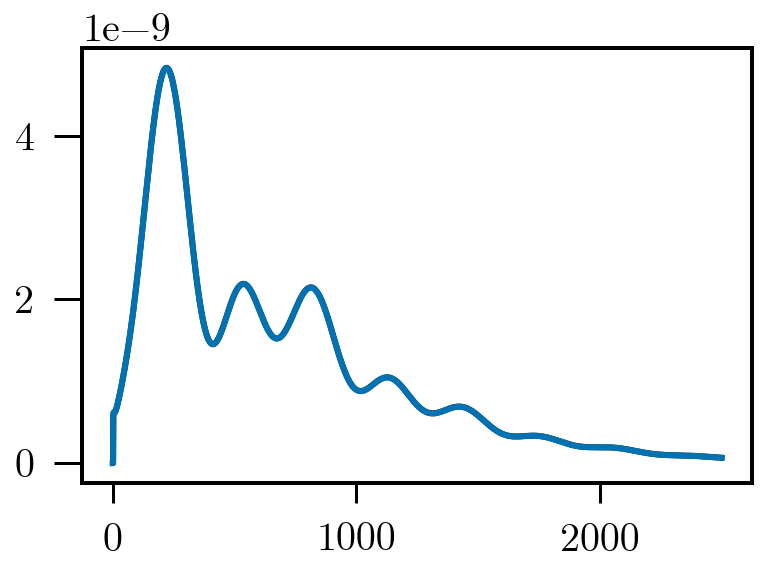

In [57]:
plt.plot( cl['tt'] * cl['ell']**2 )
plt.plot( cl_CLASS['tt'] * cl_CLASS['ell']**2 )

/home/zequnl/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:1: RuntimeWarning: invalid value encountered in true_divide
  if __name__ == '__main__':


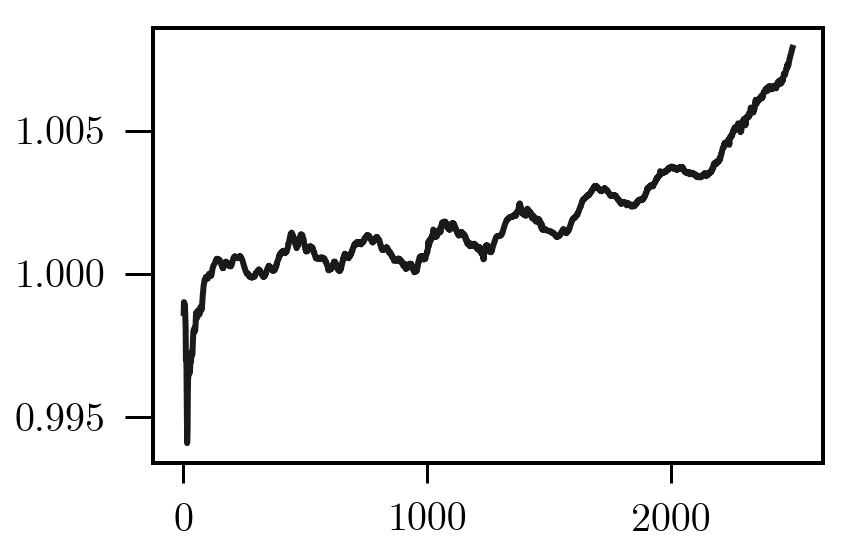

In [58]:
plt.plot( cl['tt'] / cl_CLASS['tt'], label="ratio" )

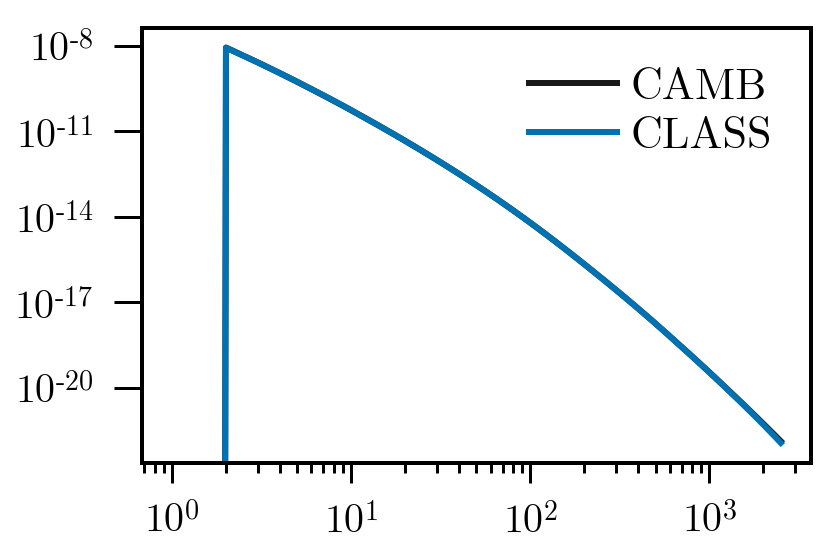

In [61]:
plt.plot( cl['pp'], label="CAMB"  )
plt.plot( cl_CLASS['pp'], label="CLASS")
plt.yscale("log")
plt.xscale("log")
plt.legend()

/home/zequnl/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:1: RuntimeWarning: invalid value encountered in true_divide
  if __name__ == '__main__':


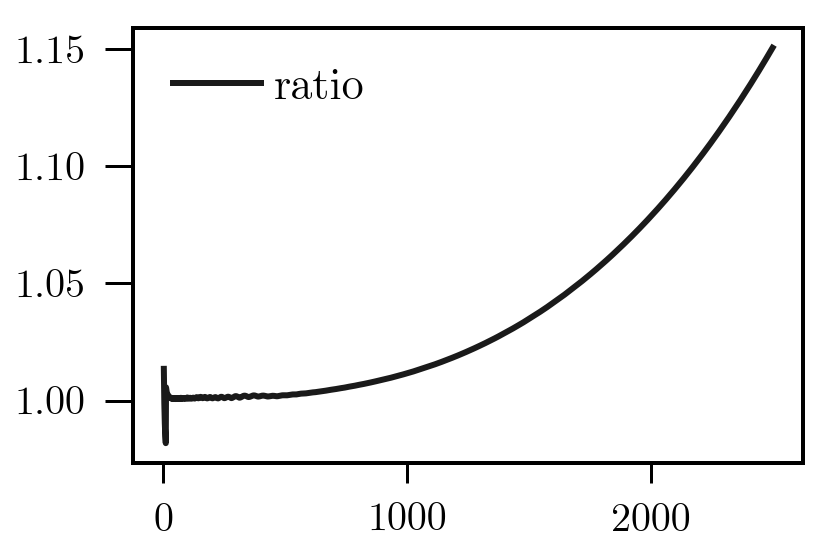

In [63]:
plt.plot( cl['pp'] / cl_CLASS['pp'], label="ratio"  )
plt.legend()